# Initializations

In [3]:
datafolder = 'data/'
tmpfolder = 'tmp/'

In [4]:
from sympy import init_printing
init_printing()

%pylab inline

Populating the interactive namespace from numpy and matplotlib


1 - Robot Model
===============

In [5]:
import sympybotics

#### Robot Definition

In [247]:
import sympy

rbtdef = sympybotics.RobotDef("mx64",
            [(0, 0, 0, "q")
             ],
            dh_convention="mdh")

rbtdef.gravityacc = sympy.Matrix([0.,9.81,0.])
# rbtdef.frictionmodel = {'Coulomb', 'viscous', 'offset'}
rbtdef.frictionmodel = {'Coulomb', 'viscous', 'offset'}
rbtdef.driveinertiamodel = 'simplified'

#### Model Generation

In [248]:
%time rbt = sympybotics.RobotDynCode(rbtdef)
%time rbt.calc_base_parms()

CPU times: user 150 ms, sys: 24.4 ms, total: 174 ms
Wall time: 152 ms
CPU times: user 485 ms, sys: 15.7 ms, total: 501 ms
Wall time: 244 ms


In [249]:
import pickle
with open(tmpfolder + 'robotmodels/mx64_model.pkl', 'wb') as file:
    pickle.dump( rbt, file )

## Base Dynamic Parameters

In [250]:
import pickle
with open(tmpfolder +  'robotmodels/mx64_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [251]:
rbt.dyn.n_dynparms, rbt.dyn.n_base

(14, 6)

In [252]:
rbt.dyn.baseparms.n()

Matrix([
[Ia_1 + L_1zz],
[        l_1x],
[        l_1y],
[        fv_1],
[        fc_1],
[        fo_1]])

In [253]:
rbt.dyn.Pb

Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1]])

In [255]:
idyn_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.invdyn_code, 'idyn', 'idyn_func', rbt.rbtdef)
print idyn_func_def

def idyn_func(parms, q, dq, ddq):
#
    idyn = [0]*1
#

    idyn[0] = ddq[0]*parms[10] + ddq[0]*parms[5] + dq[0]*parms[11] + parms[12]*sign(dq[0]) + parms[13] - 9.81*parms[6]*cos(q[0]) + 9.81*parms[7]*sin(q[0])
#
    return idyn


In [256]:
Hb_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.Hb_code, 'Hb', 'Hb_func', rbt.rbtdef)
print Hb_func_def

def Hb_func(q, dq, ddq):
#
    Hb = [0]*6
#

    Hb[0] = ddq[0]
    Hb[1] = -9.81*cos(q[0])
    Hb[2] = 9.81*sin(q[0])
    Hb[3] = dq[0]
    Hb[4] = sign(dq[0])
    Hb[5] = 1
#
    return Hb


In [40]:
from sympybotics._compatibility_ import exec_

l = locals()
exec_(idyn_func_def, globals(), l)

tau_onedof = l['idyn_func']


In [41]:
import yaml, sympy
with open(datafolder + 'robotparams/mx64_cad.yml', 'r') as f:
    mx64_cad = yaml.load(f)
dynparm_test = sympy.Matrix([mx64_cad.get(str(d), d) for d in rbt.dyn.dynparms])

In [284]:
import numpy as np

q_test = [2.62074682]#[90*np.pi/180.]
dq_test = [-0.60085045]#[0*np.pi/180.]
ddq_test = [(-0.62453592+0.60085045)/0.02]#[0*np.pi/180.]

In [285]:
tau1 = tau_onedof(dynparm_test, q_test, dq_test, ddq_test)
tau1

[-6.86281899204302]

2 - Excited Trajectory Optimization
==================================

In [257]:
import pickle
with open(tmpfolder +  'robotmodels/mx64_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [273]:
from trajectory_optimization3 import TrajOptimizer
from trajectory_optimization3 import TrajPlotter
from numpy import deg2rad



base_freq = 0.05
fourier_order = 6

joint_constraints = []
cartesian_constraints = []


joint_constraints = [(1, deg2rad(-90), deg2rad(90), deg2rad(-120), deg2rad(120))
                     ]

    
traj_optimizer = TrajOptimizer(rbt, fourier_order, base_freq,
                               joint_constraints=joint_constraints,
                               cartesian_constraints = cartesian_constraints)
                                                                                                 
                                                                                                                     
traj_optimizer.optimize()

joint constraint number: 1
cartesian constraint number: 0
constraint number: 4
frames_constrained: []
cond: 15.028761763
cond: 15.028761763
cond: 15.0287616586
cond: 15.0287619757
cond: 15.0287598853
cond: 15.0287614434
cond: 15.0287620534
cond: 15.0287614509
cond: 15.0287628016
cond: 15.0287644404
cond: 15.028761173
cond: 15.0287633006
cond: 15.0287618975
cond: 15.02876162
cond: 20.9797318379
cond: 20.9797318379
cond: 20.9797212944
cond: 20.9797274778
cond: 20.9797295935
cond: 20.9797309827
cond: 20.9797333689
cond: 20.9797291933
cond: 20.9797322587
cond: 20.979732832
cond: 20.9797303745
cond: 20.9797280831
cond: 20.9797319446
cond: 20.9797307198
cond: 21.7935638906
cond: 20.9059356796
cond: 19.7113259619
cond: 19.7113259619
cond: 19.7113269302
cond: 19.7113094779
cond: 19.7113161542
cond: 19.7113187778
cond: 19.7113288248
cond: 19.7113261263
cond: 19.7113341593
cond: 19.7113371739
cond: 19.7113160503
cond: 19.7113257691
cond: 19.711323396
cond: 19.7113222017
cond: 22.3423055119
cond:

cond: 17.2477793515
cond: 17.2477737196
cond: 17.2477761858
cond: 17.2477814886
cond: 17.2477750045
cond: 17.2477790339
cond: 17.2477825138
cond: 17.2477741359
cond: 21.622519631
cond: 18.3842144404
cond: 17.6758944241
cond: 17.5638517275
cond: 17.5096661902
cond: 17.2473817334
cond: 17.2473817334
cond: 17.2473858575
cond: 17.247382989
cond: 17.2473807228
cond: 17.2473761383
cond: 17.2473823943
cond: 17.2473767597
cond: 17.2473792339
cond: 17.2473845271
cond: 17.2473780781
cond: 17.2473820771
cond: 17.2473855535
cond: 17.2473771687
cond: 20.5347068116
cond: 21.2203728118
cond: 19.3170716363
cond: 17.4178444384
cond: 17.3684506491
cond: 17.2459496386
cond: 17.2459496386
cond: 17.2459540925
cond: 17.2459411608
cond: 17.2459459685
cond: 17.245941664
cond: 17.2459504312
cond: 17.245945719
cond: 17.2459455019
cond: 17.2459546512
cond: 17.2459405844
cond: 17.2459501885
cond: 17.2459534256
cond: 17.2459472232
cond: 19.4415497031
cond: 18.9113343464
cond: 18.1990424091
cond: 17.3452628331
cond

## plot excited trajectory

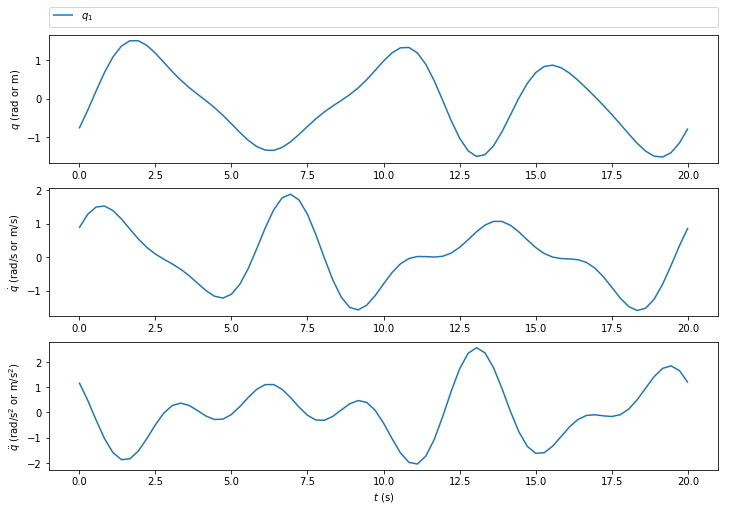

In [274]:
# %matplotlib qt 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj_plotter = TrajPlotter(traj_optimizer.fourier_traj,traj_optimizer.frame_traj,
                           traj_optimizer.const_frame_ind)
traj_plotter.plot_desired_traj(traj_optimizer.x_result)

## save trajectory

In [275]:
from utils import save_data, load_data

trajectory_name = 'mx64'
trajectory_folder =  'data/trajectories/'

dof_order_bf_x_norm = (traj_optimizer.fourier_traj.dof, fourier_order,
                       base_freq, traj_optimizer.x_result, [])
save_data(trajectory_folder, trajectory_name, dof_order_bf_x_norm)

freq = 50
tf = 65 # including 5 seconds' prestable time
traj_optimizer.make_traj_csv(trajectory_folder, trajectory_name, freq, tf)

## display trajectory param

In [276]:
from IPython.display import HTML, display
import tabulate
import numpy as np

table = []
table.append(["joint", 'qo'] +
             ["a"+str(i+1) for i in range(fourier_order)] +
             ["b"+str(i+1) for i in range(fourier_order)])
for i in range(traj_optimizer.fourier_traj.dof):
    line = []
    line.append(rbt.rbtdef.q[i])
    line += np.round(traj_optimizer.x_result[i*(1 + fourier_order*2): (i+1)*(1 + fourier_order*2)], 4).tolist()
    table.append(line)

display(HTML(tabulate.tabulate(table, tablefmt='html')))

joint,qo,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
q1,-0.096,0.0014,0.3029,0.5241,0.5956,-0.1754,0.3005,-0.0026,-0.1538,0.8196,-0.1892,0.0198,0.3782


3 - Regression Data Processing
==============================

In [1128]:
import os
import pickle
import math
import sympy
import numpy
import sympybotics

In [1129]:
with open(tmpfolder +  'robotmodels/mx64_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

### Data Load

In [1130]:
parms_traj = 'traj1'

In [1131]:
from support_funcs.regr_data_proc import load_trajectory_data

training_results_data_file = datafolder +'recdata/' + 'mx64_'+parms_traj+'_results.csv'

trajectory_sampling_rate = 50
t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)

(<type 'numpy.ndarray'>, (2990, 3))


### Some Plots

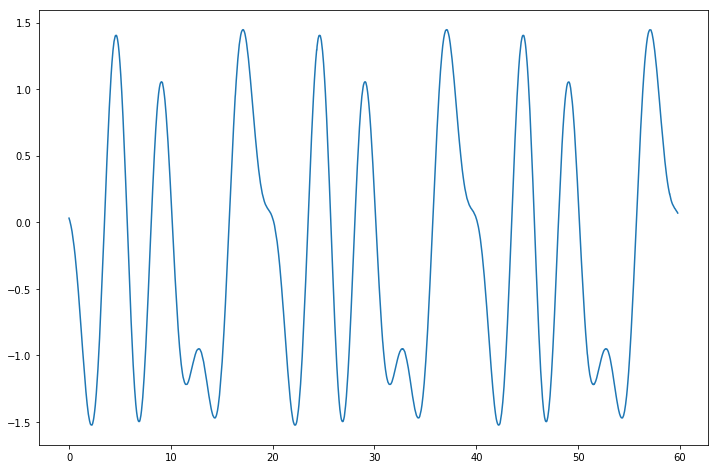

In [1132]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
plt.close()

# for d in range(rbt.dof):
#     co_num = str(d + 1)
#     plt.plot(t_raw, q_raw[:, d], label=(r"$q_" + co_num +"$"), linestyle= (0, ()))
    
for i in range(q_raw.shape[1]):
    plt.plot(t_raw,q_raw[:,i])

plt.show()

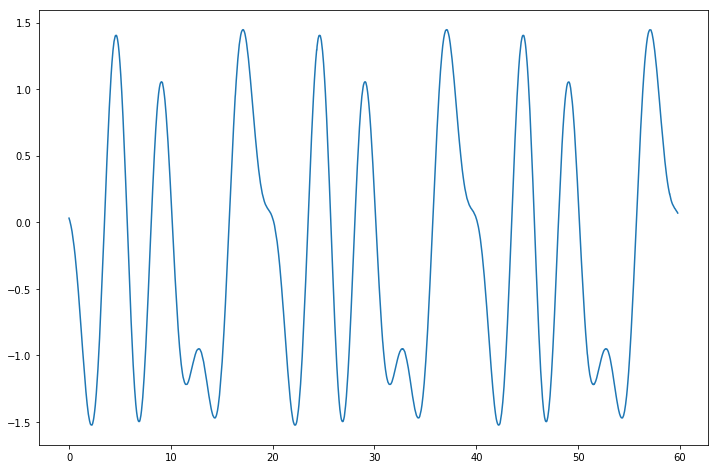

In [1133]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
# plt.plot(t_ref+0.20,q_ref[:,joint-1])
plt.plot(t_raw,q_raw[:,joint-1])

plt.show()

In [1134]:
del t_raw, q_raw, dq_raw,tau_raw

### Parameter Load

In [1135]:
from utils import save_data, load_data

training_trajectory_name = 'mx64_traj1'


trajectory_folder = datafolder +'trajectories/'
dof, fourier_order, base_freq, traj_optimizer_result, reg_norm_mat = load_data(trajectory_folder,
                                                                               training_trajectory_name)
print("dof: {}".format(dof))
print("Fourier order: {}".format(fourier_order))
print("Base frequency: {}".format(base_freq))

dof: 1
Fourier order: 6
Base frequency: 0.05


### Filter Cut-off Frequency Definition

In [1136]:
# times of the highest frequency in the Fourier series
fc_mult = 5.0   #5.0

fc = base_freq * fourier_order * fc_mult
print("Cut frequency: {}".format(fc))

Cut frequency: 1.5


In [1137]:
fc_q = fc
fc_dq = fc
fc_ddq = fc

fc_tau =  fc

si = 200
sf = -200

### Data Filtering, Differentiation and Regression Data Generation

In [1138]:
rec_h = 0.02

In [1146]:
from support_funcs2.regr_data_proc import load_trajectory_data, plot_trajectory_data, \
                                            diff_and_filt_data, gen_regr_matrices,gen_friction_regr_matrices 


def process_regression_data(traj_name):
#     t_raw, q_raw, tau_raw, t_ref, q_ref = read_data(dof=rbt.dof, h=rec_h,
#                                                     rbtlogfile=datafolder + 'recdata/rbtlog_%s.dat'%traj_name,
#                                                     trajreffile=datafolder + 'trajectories/%s.dat'%traj_name)
    
    training_results_data_file = datafolder +'recdata/' + 'mx64_%s_results.csv'%traj_name
    trajectory_sampling_rate = 50
    t_raw, q_raw, dq_raw, tau_raw = load_trajectory_data(training_results_data_file,
                                                                   trajectory_sampling_rate)
    
    q, dq, ddq, tau = diff_and_filt_data(dof=rbt.dof, h=rec_h,  q_raw=q_raw, tau_raw=tau_raw,
                                   fc_q=fc_q, fc_dq=fc_dq, fc_ddq=fc_ddq, fc_tau=fc_tau)
    
    t_raw = t_raw[si:sf]; q_raw = q_raw[si:sf]; tau_raw = tau_raw[si:sf]
    q = q[si:sf]; dq = dq[si:sf]; ddq = ddq[si:sf]; tau = tau[si:sf]
    
    t_raw = t_raw - t_raw[0]
    
    t = numpy.array(range(q.shape[0])) * rec_h
    
    W, omega, Q1, R1, rho1 = gen_regr_matrices(rbt, q, dq, ddq, tau)   # gen_friction_regr_matrices(rbt, q, dq, ddq, tau)
    
    return t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

>>>>>>>> traj1 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 3))
CPU times: user 84.6 ms, sys: 0 ns, total: 84.6 ms
Wall time: 67.3 ms
 (cond=3.485301)
traj1 save
CPU times: user 109 ms, sys: 0 ns, total: 109 ms
Wall time: 44.7 ms
plot shape: 410


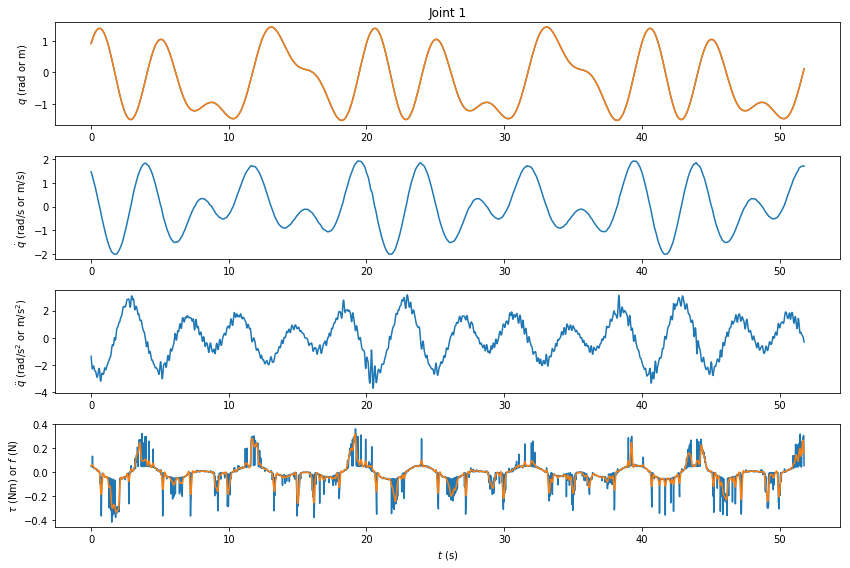

>>>>>>>> traj2 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 3))
CPU times: user 53.5 ms, sys: 0 ns, total: 53.5 ms
Wall time: 51.7 ms
 (cond=3.831097)
traj2 save
CPU times: user 41.9 ms, sys: 91 µs, total: 42 ms
Wall time: 17.8 ms
plot shape: 410


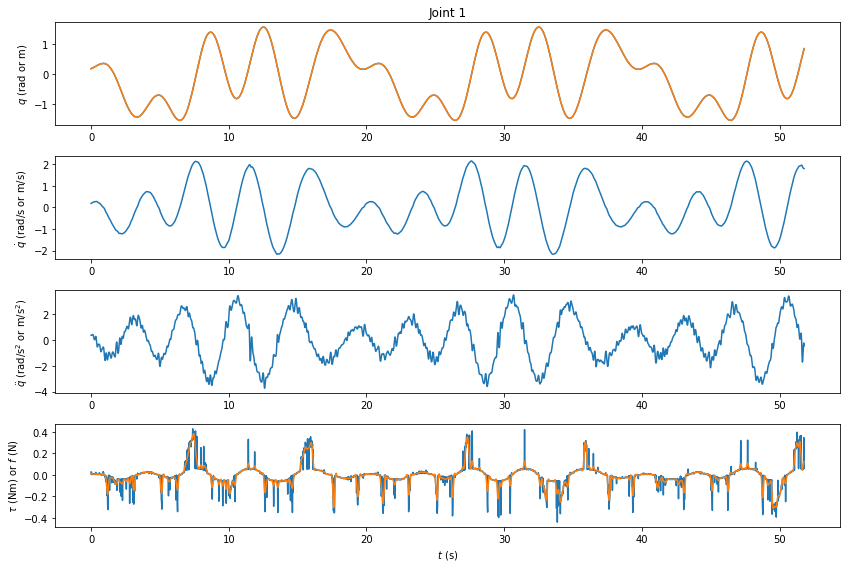

>>>>>>>> traj3 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 3))
CPU times: user 62.8 ms, sys: 0 ns, total: 62.8 ms
Wall time: 59.8 ms
 (cond=3.261969)
traj3 save
CPU times: user 44.3 ms, sys: 0 ns, total: 44.3 ms
Wall time: 19.2 ms
plot shape: 410


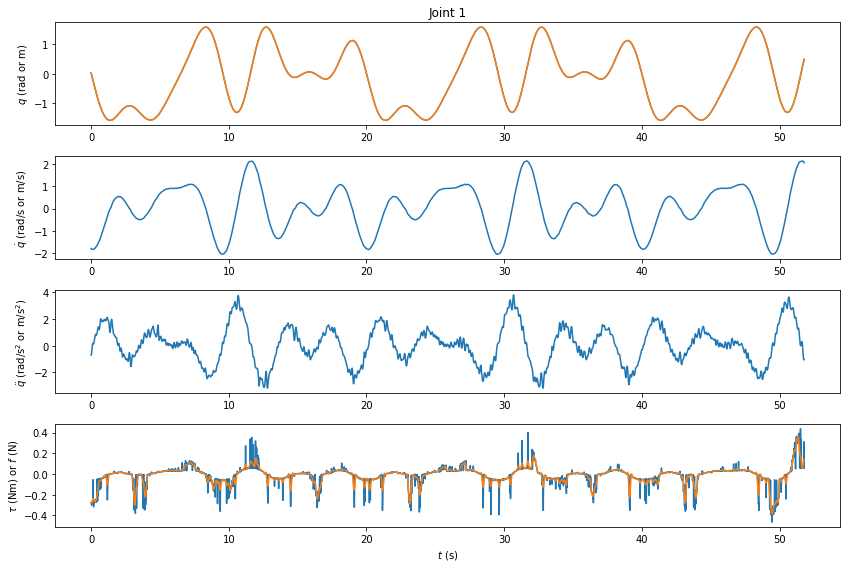

>>>>>>>> traj4 proc <<<<<<<<<
(<type 'numpy.ndarray'>, (2990, 3))
CPU times: user 62.6 ms, sys: 0 ns, total: 62.6 ms
Wall time: 60.5 ms
 (cond=3.875826)
traj4 save
CPU times: user 45.5 ms, sys: 4.15 ms, total: 49.7 ms
Wall time: 19.4 ms
plot shape: 410


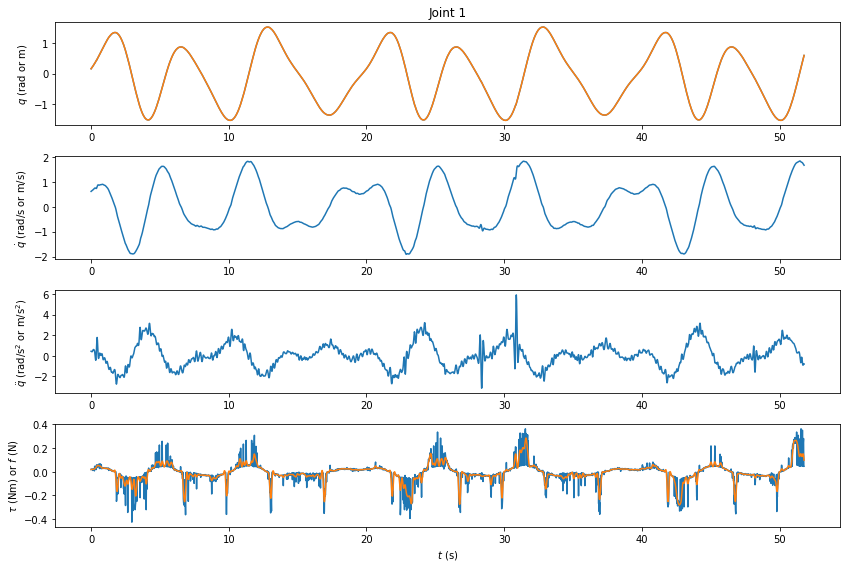

In [1147]:
from support_funcs.utils import _fprint
from support_funcs.regr_data_proc import plot_trajectory_data

for traj in ['traj1', 'traj2', 'traj3', 'traj4']:      #
    _fprint('>>>>>>>> %s proc <<<<<<<<<'%traj)
    %time t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1 = process_regression_data(traj)
    
    _fprint(' (cond=%f)'%numpy.linalg.cond(W))
    
    _fprint('%s save'%traj)
    
    %time \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_raw', t=t_raw, q=q_raw, tau=tau_raw);\
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_proc', t=t, q=q, dq=dq, ddq=ddq, tau=tau); \
    numpy.savez_compressed(tmpfolder + 'procdata/' + traj + '_regr', W=W, omega=omega, Q1=Q1, R1=R1, rho1=rho1)
    
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [12,8]
    plot_trajectory_data(t, q_raw, q, dq, ddq,
                     tau_raw, tau)
    
    del t_raw, q_raw, tau_raw, t, q, dq, ddq, tau, W, omega, Q1, R1, rho1

### Plot

In [1148]:
raw = numpy.load(tmpfolder + 'procdata/traj1_raw.npz')
tau_raw = raw['tau']
q_raw = raw['q']
del raw
proc = numpy.load(tmpfolder + 'procdata/traj1_proc.npz')
t = proc['t']
tau = proc['tau']
q = proc['q']
dq = proc['dq']
del proc

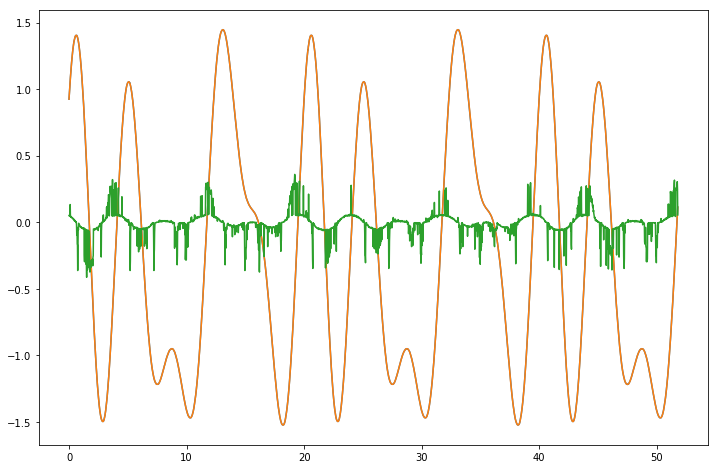

In [1149]:
from matplotlib import pyplot as plt
plt.close()

joint = 1
firsts = 20000
plt.plot(t[:firsts],q_raw[:,joint-1][:firsts])
plt.plot(t[:firsts],q[:,joint-1][:firsts])
#plt.plot(t[:firsts],dq[:,joint-1][:firsts])
plt.plot(t[:firsts],tau_raw[:,joint-1][:firsts])

plt.show()

In [1150]:
del t, q, dq, tau, q_raw, tau_raw

4 - Dynamic Parameter Estimation
================================

In [1034]:
import os
import pickle
import sympy
import numpy
import time

import sympybotics
import lmi_sdp

from lmi_sdp import init_lmi_latex_printing
init_lmi_latex_printing()

In [1035]:
with open(tmpfolder +  'robotmodels/mx64_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [1036]:
epsilon_safemargin = 1e-6
epsilon_sdptol = 1e-7

## LMI Matrix Definitions

In [1037]:
dof = rbt.dof

delta = rbt.dyn.dynparms
n_delta = rbt.dyn.n_dynparms

beta = rbt.dyn.baseparms.n()
n_beta = rbt.dyn.n_base
beta_symbs = sympy.Matrix([sympy.Symbol('beta'+str(i+1),real=True) for i in range(n_beta)])

delta_d = (rbt.dyn.Pd.T*delta)
n_delta_d = len(delta_d)

Pb = rbt.dyn.Pb

varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [1038]:
from support_funcs.utils import skew, mrepl
from sympy import BlockMatrix, Matrix, eye, Identity
I = Identity
S = skew

In [1039]:
D_inertia_blocks = []
for i in range(dof):
    L = rbt.rbtdef.L[i]
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    Di = BlockMatrix([[L,    S(l).T],
                      [S(l), I(3)*m]])
    D_inertia_blocks.append(Di.as_explicit())

In [1040]:
D_inertia_blocks[0]

Matrix([
[L_1xx, L_1xy, L_1xz,     0,  l_1z, -l_1y],
[L_1xy, L_1yy, L_1yz, -l_1z,     0,  l_1x],
[L_1xz, L_1yz, L_1zz,  l_1y, -l_1x,     0],
[    0, -l_1z,  l_1y,   m_1,     0,     0],
[ l_1z,     0, -l_1x,     0,   m_1,     0],
[-l_1y,  l_1x,     0,     0,     0,   m_1]])

In [1041]:
D_other_blocks = []
for i in range(dof):
    if rbt.rbtdef.driveinertiamodel == 'simplified':
        D_other_blocks.append( Matrix([rbt.rbtdef.Ia[i]]) )
    if 'viscous' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fv[i]]) )
    if 'Coulomb' in rbt.rbtdef.frictionmodel:
        D_other_blocks.append( Matrix([rbt.rbtdef.fc[i]]) )

D_other_blocks

[Matrix([[Ia_1]]), Matrix([[fv_1]]), Matrix([[fc_1]])]

In [1042]:
D_blocks = D_inertia_blocks + D_other_blocks

In [1043]:
D_blocks

[Matrix([
 [L_1xx, L_1xy, L_1xz,     0,  l_1z, -l_1y],
 [L_1xy, L_1yy, L_1yz, -l_1z,     0,  l_1x],
 [L_1xz, L_1yz, L_1zz,  l_1y, -l_1x,     0],
 [    0, -l_1z,  l_1y,   m_1,     0,     0],
 [ l_1z,     0, -l_1x,     0,   m_1,     0],
 [-l_1y,  l_1x,     0,     0,     0,   m_1]]),
 Matrix([[Ia_1]]),
 Matrix([[fv_1]]),
 Matrix([[fc_1]])]

## Change of Variable Space

In [1044]:
varchange_dict = dict(zip(Pb.T*delta ,  beta_symbs - ( beta - Pb.T*delta )))

In [1045]:
DB_blocks = [mrepl(Di, varchange_dict) for Di in D_blocks]
DB_blocks

[Matrix([
 [ L_1xx, L_1xy,         L_1xz,     0,   l_1z, -beta3],
 [ L_1xy, L_1yy,         L_1yz, -l_1z,      0,  beta2],
 [ L_1xz, L_1yz, -Ia_1 + beta1, beta3, -beta2,      0],
 [     0, -l_1z,         beta3,   m_1,      0,      0],
 [  l_1z,     0,        -beta2,     0,    m_1,      0],
 [-beta3, beta2,             0,     0,      0,    m_1]]),
 Matrix([[Ia_1]]),
 Matrix([[beta4]]),
 Matrix([[beta5]])]

## LMI Definitions

In [1046]:
from lmi_sdp import LMI_PD, LMI

In [1047]:
DB_LMIs = list(map(LMI_PD, DB_blocks))

In [1048]:
DB_LMIs[0]

Matrix([
[ L_1xx, L_1xy,         L_1xz,     0,   l_1z, -beta3],
[ L_1xy, L_1yy,         L_1yz, -l_1z,      0,  beta2],
[ L_1xz, L_1yz, -Ia_1 + beta1, beta3, -beta2,      0],
[     0, -l_1z,         beta3,   m_1,      0,      0],
[  l_1z,     0,        -beta2,     0,    m_1,      0],
[-beta3, beta2,             0,     0,      0,    m_1]]) > 0

In [1049]:
DB_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_blocks))

In [1050]:
DB_LMIs_marg[0]

Matrix([
[ L_1xx, L_1xy,         L_1xz,     0,   l_1z, -beta3],
[ L_1xy, L_1yy,         L_1yz, -l_1z,      0,  beta2],
[ L_1xz, L_1yz, -Ia_1 + beta1, beta3, -beta2,      0],
[     0, -l_1z,         beta3,   m_1,      0,      0],
[  l_1z,     0,        -beta2,     0,    m_1,      0],
[-beta3, beta2,             0,     0,      0,    m_1]]) >= Matrix([
[1.0e-6,      0,      0,      0,      0,      0],
[     0, 1.0e-6,      0,      0,      0,      0],
[     0,      0, 1.0e-6,      0,      0,      0],
[     0,      0,      0, 1.0e-6,      0,      0],
[     0,      0,      0,      0, 1.0e-6,      0],
[     0,      0,      0,      0,      0, 1.0e-6]])

In [1051]:
DB_LMIs_marg[0].canonical()

Matrix([
[L_1xx - 1.0e-6,          L_1xy,                  L_1xz,            0,         l_1z,       -beta3],
[         L_1xy, L_1yy - 1.0e-6,                  L_1yz,        -l_1z,            0,        beta2],
[         L_1xz,          L_1yz, -Ia_1 + beta1 - 1.0e-6,        beta3,       -beta2,            0],
[             0,          -l_1z,                  beta3, m_1 - 1.0e-6,            0,            0],
[          l_1z,              0,                 -beta2,            0, m_1 - 1.0e-6,            0],
[        -beta3,          beta2,                      0,            0,            0, m_1 - 1.0e-6]]) >= 0

## SDP Solver Interfaces

### [SDPA](http://sdpa.sourceforge.net/)

In [437]:
def sdpa(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !sdpa -ds "$tmpfolder"sdpa_dat/sdp.dat-s -o "$tmpfolder"sdpa_dat/sdpa.out -p "$tmpfolder"sdpa_dat/param.sdpa -pt 2
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/sdpa.out
    sol = [float(v) for v in outfile[outfile.index('xVec = ') + 1].replace('{', '').replace('}', '').split(',')]
    return numpy.matrix(sol).T

### [CSDP](https://projects.coin-or.org/Csdp/)

In [174]:
def csdp(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; csdp sdp.dat-s csdp.out
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/csdp.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5](doi.org/10.1145/1356052.1356057)

In [561]:
def dsdp5(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdp.dat-s', 'w') as f:
        f.write(sdpadat)
    
    stdout = !cd "$tmpfolder"sdpa_dat; dsdp5 sdp.dat-s -save dsdp5.out -gaptol $epsilon_sdptol
    print('\n'.join(stdout))

    outfile = !cat "$tmpfolder"sdpa_dat/dsdp5.out
    sol = [float(v) for v in outfile[0].split()]
    return numpy.matrix(sol).T

### [DSDP5 through CVXOPT](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [142]:
def cvxopt_dsdp5(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['DSDP_GapTolerance'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs, solver='dsdp')
    toc = time.time()
    print(sdpout['status'], ('ATT!: \'optimal\' does not necessarlly means feasible'))
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [CVXOPT CONELP](http://abel.ee.ucla.edu/cvxopt/userguide/coneprog.html#cvxopt.solvers.sdp)

In [143]:
def cvxopt_conelp(objf, lmis, variables):
    import cvxopt.solvers
    c, Gs, hs = lmi_sdp.to_cvxopt(objf, lmis, variables)
    cvxopt.solvers.options['feastol'] = epsilon_sdptol
    tic = time.time()
    sdpout = cvxopt.solvers.sdp(c, Gs=Gs, hs=hs)
    toc = time.time()
    print(sdpout['status'])
    print('Elapsed time: %.2f s'%(toc-tic))
    return numpy.matrix(sdpout['x'])

### [Raw SDPA file](http://plato.asu.edu/ftp/sdpa_format.txt)

Can be solved online with a *Semidefinite Programming* solver at [NEOS Solvers](http://www.neos-server.org/neos/solvers/index.html)

In [562]:
def sdpa_file(objf, lmis, variables):
    sdpadat = lmi_sdp.to_sdpa_sparse(objf, lmis, variables)
    with open(tmpfolder + 'sdpa_dat/sdpa_input.dat-s', 'w') as f:
        f.write(sdpadat)
        
    print("SDPA file saved at: %ssdpa_dat/sdpa_input.dat-s"%tmpfolder)

--------------

Setting the default SDP solver:

In [563]:
solve_sdp = dsdp5

## OLS Regression ($\hat{\beta}$)

In [1151]:
indentification_traj = 'traj1'

In [1152]:
regr_mats = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_regr.npz')
W = numpy.matrix(regr_mats['W'])
omega = numpy.matrix(regr_mats['omega'])
R1 = numpy.matrix(regr_mats['R1'])
rho1 = numpy.matrix(regr_mats['rho1'])

In [1153]:
omega.shape[0] / rbt.dof

2590

In [1154]:
W.shape

(2590, 4)

In [1155]:
numpy.linalg.cond(W)

3.485301162501939

In [1156]:
%time beta_ols = (R1.T * R1).I * R1.T * rho1

CPU times: user 619 µs, sys: 0 ns, total: 619 µs
Wall time: 1.36 ms


In [1157]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_ols.dat', beta_ols)

In [1158]:
rho2_norm_sqr = numpy.linalg.norm(omega - W * beta_ols)**2

### plot measured and predicted torque

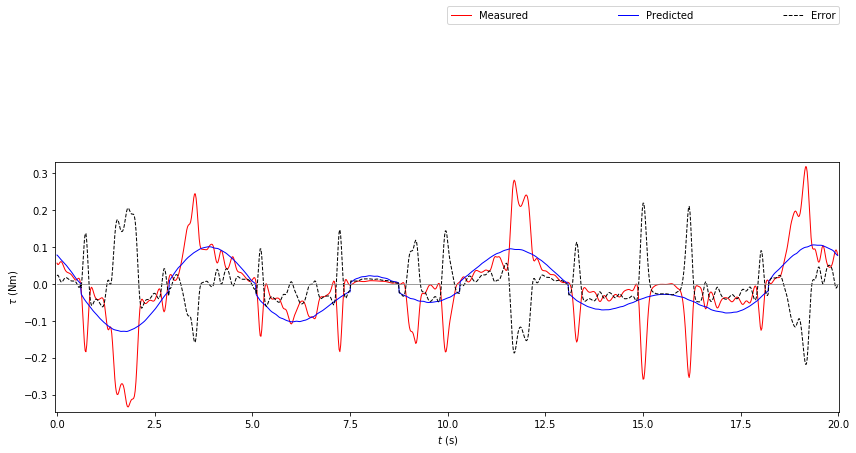

In [1159]:
from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_ols)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

## Weighted Least Square (WLS)

In [1160]:
proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

weight = np.max(tau, axis=0) - np.min(tau, axis=0)
print("weight: ")
print(weight)


# repeat the weight to generate a large vecoter for all the data
weights = 1.0/np.tile(weight, W.shape[0]/weight.shape[0])

weight: 
[0.65082711]


In [1161]:
weights[0:6]

array([1.53650637, 1.53650637, 1.53650637, 1.53650637, 1.53650637,
       1.53650637])

In [1162]:
W_wls = np.multiply(W, np.asmatrix(weights).transpose())
omega_wls = np.multiply(omega.T, weights).T
Q1_wls,R1_wls = numpy.linalg.qr(W_wls)
rho1_wls = Q1_wls.T*omega_wls

In [1163]:
%time beta_wls = (R1_wls.T * R1_wls).I * R1_wls.T * rho1_wls

CPU times: user 273 µs, sys: 0 ns, total: 273 µs
Wall time: 278 µs


In [1164]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_wls.dat', beta_wls)

In [1165]:
rho2_norm_sqr_wls = numpy.linalg.norm(omega_wls - W_wls * beta_wls)**2

### plot measured and predicted torque

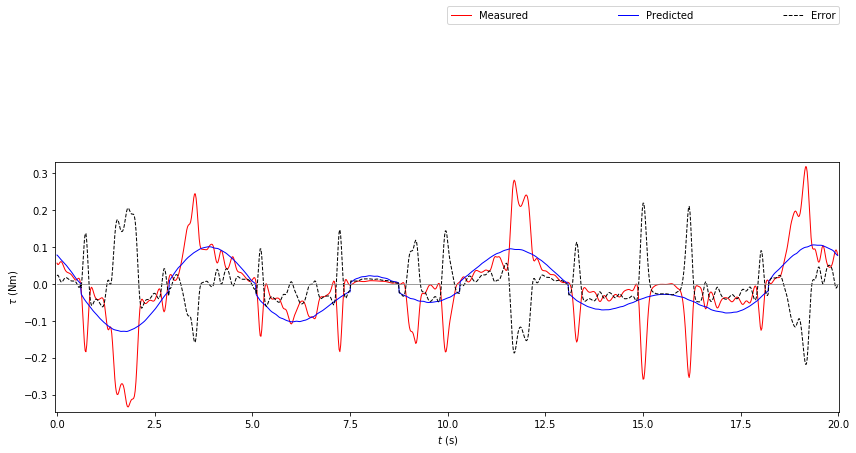

In [1166]:
from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_wls)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Base Parameter Feasibility Test (BPFT) of OLS Solution

In [1068]:
dict_subs = dict(zip(beta_symbs, beta_wls.flatten().tolist()[0]))
lmis_ols_bpft = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_LMIs ]

In [1069]:
lmis_ols_bpft[0]

Matrix([
[              L_1xx,                L_1xy,                        L_1xz,                    0,                  l_1z,  0.00909043171049995],
[              L_1xy,                L_1yy,                        L_1yz,                -l_1z,                     0, 0.000970662417731237],
[              L_1xz,                L_1yz, -Ia_1 - 0.000561671256533513, -0.00909043171049995, -0.000970662417731237,                    0],
[                  0,                -l_1z,         -0.00909043171049995,                  m_1,                     0,                    0],
[               l_1z,                    0,        -0.000970662417731237,                    0,                   m_1,                    0],
[0.00909043171049995, 0.000970662417731237,                            0,                    0,                     0,                  m_1]]) > 0

In [1070]:
variables_ols_bpft = list(delta_d)
objf_ols_bpft = 0  # no objective function - "find" problem

Testing with all solvers

**Just one of the following calls is sufficient to show feasibility/infeasibility**

In [1071]:
sol = sdpa_file(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft) # One can solve the output file at http://www.neos-server.org/neos/solvers/sdp:DSDP/SDPA.html for example.

SDPA file saved at: tmp/sdpa_dat/sdpa_input.dat-s


In [1072]:
sol = dsdp5(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 8 
Matrix Blocks: 4, Total Number of Constraints: 9 
Nonzeros in Constraints: 19

Read Data File into Buffer:      7.701e-05 seconds
DSDP Set Data:                   6.509e-05 seconds
DSDP Process Data:               6.795e-05 seconds

Data Norms: C: 8.16e-02, A: 4.12e+00, b: 0.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.16829821e+12   1.0e+00   1.2e+04   1.2e+12  0.00  0.00   0.00 
10    3.16622799e+09   -2.49521902e+07   5.8e+01   2.5e-01   4.6e+06  1.00  1.00  28.75 
20   -2.80835632e+04   -2.80835633e+04   3.4e-04   2.8e-04   1.2e-06  1.00  0.24   5.39 
21   -2.80835633e+04   -2.80835633e+04   6.9e-05   2.8e-04   5.4e-07  1.00  1.00   4.09 
DSDP Converged. 
DSDP Primal Unbounded, Dual Infeasible

P O

In [807]:
sol = sdpa(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

SDPA (Version 7.3.9) start at [Wed Nov 21 15:49:55 2018]
set   is STABLE_BUT_SLOW
data  is tmp/sdpa_dat/sdp.dat-s : sparse
out   is tmp/sdpa_dat/sdpa.out
NumThreads  is set as 1
Schur computation : DENSE 
Entering DMUMPS driver with JOB, N, NZ =  -2           0              0
   mu      thetaP  thetaD  objP      objD      alphaP  alphaD  beta 
 0 1.0e+08 1.0e+00 1.0e+00 -0.00e+00 -9.51e+02 8.0e-01 8.0e-01 3.00e-01
 1 3.0e+07 2.0e-01 2.0e-01 -0.00e+00 -1.41e+03 8.0e-01 8.0e-01 3.00e-01
 2 8.8e+06 4.0e-02 4.0e-02 -0.00e+00 -2.08e+03 8.0e-01 8.0e-01 3.00e-01
 3 2.6e+06 8.0e-03 8.0e-03 -0.00e+00 -3.08e+03 8.0e-01 8.0e-01 3.00e-01
 4 7.7e+05 1.6e-03 1.6e-03 -0.00e+00 -4.56e+03 8.0e-01 8.0e-01 3.00e-01
 5 2.3e+05 3.2e-04 3.2e-04 -0.00e+00 -6.70e+03 8.0e-01 8.0e-01 3.00e-01
 6 6.8e+04 6.4e-05 6.4e-05 -0.00e+00 -9.59e+03 8.0e-01 8.0e-01 3.00e-01
 7 2.1e+04 1.2e-05 1.3e-05 -0.00e+00 -1.22e+04 8.2e-01 8.0e-01 3.00e-01
 8 6.5e+03 2.2e-06 2.6e-06 -0.00e+00 -1.06e+04 9.1e-01 8.0e-01 3.00e-01
 9 2.0

In [135]:
sol = csdp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

This is a pure dual feasibility problem.
Iter:  0 Ap: 0.00e+00 Pobj: -3.8296290e+03 Ad: 0.00e+00 Dobj:  0.0000000e+00 
Iter:  1 Ap: 8.96e-01 Pobj: -5.2770492e+03 Ad: 8.16e-01 Dobj:  0.0000000e+00 
Iter:  2 Ap: 6.30e-01 Pobj: -4.7758728e+03 Ad: 6.04e-01 Dobj:  0.0000000e+00 
Iter:  3 Ap: 5.03e-01 Pobj: -4.1867025e+03 Ad: 8.53e-01 Dobj:  0.0000000e+00 
Iter:  4 Ap: 8.74e-01 Pobj: -1.5539887e+03 Ad: 4.75e-01 Dobj:  0.0000000e+00 
Iter:  5 Ap: 3.90e-01 Pobj:  2.5868012e+00 Ad: 2.09e-01 Dobj:  0.0000000e+00 
Iter:  6 Ap: 8.83e-02 Pobj:  2.6946911e+03 Ad: 1.83e-01 Dobj:  0.0000000e+00 
Iter:  7 Ap: 3.62e-03 Pobj:  8.0058280e+03 Ad: 1.06e-02 Dobj:  0.0000000e+00 
Iter:  8 Ap: 1.61e-02 Pobj:  6.0199514e+04 Ad: 1.30e-02 Dobj:  0.0000000e+00 
Iter:  9 Ap: 6.67e-03 Pobj:  2.9195543e+05 Ad: 8.91e-03 Dobj:  0.0000000e+00 
Iter: 10 Ap: 4.86e-03 Pobj:  1.5474164e+06 Ad: 7.36e-03 Dobj:  0.0000000e+00 
Iter: 11 Ap: 7.92e-04 Pobj:  3.2963353e+06 Ad: 1.12e-02 Dobj:  0.0000000e+00 
Iter: 12 Ap: 1.26e-03 P

In [144]:
sol = cvxopt_conelp(objf_ols_bpft, lmis_ols_bpft, variables_ols_bpft)

     pcost       dcost       gap    pres   dres   k/t
 0:  0.0000e+00 -1.2158e+01  1e+02  2e+00  7e+00  1e+00
 1:  0.0000e+00 -2.3016e-01  3e+00  2e-01  6e-01  8e-01
 2:  0.0000e+00 -9.6107e-02  1e+00  6e-02  2e-01  3e-01
 3:  0.0000e+00  2.0962e-01  4e+01  3e-01  1e+00  2e+00
 4:  0.0000e+00  7.3312e-01  3e+01  1e-01  5e-01  2e+00
 5:  0.0000e+00  4.7892e-01  2e+01  7e-02  3e-01  1e+00
 6:  0.0000e+00  3.4714e+00  1e+02  6e-02  2e-01  4e+00
 7:  0.0000e+00  1.1664e+01  3e+02  6e-02  2e-01  1e+01
 8:  0.0000e+00  1.0313e+02  2e+03  5e-02  2e-01  1e+02
 9:  0.0000e+00  1.7208e+03  4e+04  5e-02  2e-01  2e+03
10:  0.0000e+00  1.3030e+04  3e+05  5e-02  2e-01  1e+04
11:  0.0000e+00  9.8979e+04  2e+06  5e-02  2e-01  1e+05
12:  0.0000e+00  3.6891e+05  8e+06  5e-02  2e-01  4e+05
13:  0.0000e+00  9.4734e+05  2e+07  5e-02  2e-01  9e+05
14:  0.0000e+00  1.0511e+06  3e+07  5e-02  2e-01  1e+06
15:  0.0000e+00  1.0467e+07  3e+08  5e-02  2e-01  1e+07
Certificate of primal infeasibility found.
primal 

## Base Parameter Feasibility Correction (BPFC)     ($\beta^\prime$)

In [1073]:
u = sympy.Symbol('u')
U_beta = BlockMatrix([[Matrix([u]),            (beta_wls - beta_symbs).T],
                 [beta_wls - beta_symbs,                 I(n_beta)]])
U_beta = U_beta.as_explicit()

In [1074]:
lmis_ols_bpfc = [LMI(U_beta)] + DB_LMIs_marg

In [1075]:
lmis_ols_bpfc[1]

Matrix([
[ L_1xx, L_1xy,         L_1xz,     0,   l_1z, -beta3],
[ L_1xy, L_1yy,         L_1yz, -l_1z,      0,  beta2],
[ L_1xz, L_1yz, -Ia_1 + beta1, beta3, -beta2,      0],
[     0, -l_1z,         beta3,   m_1,      0,      0],
[  l_1z,     0,        -beta2,     0,    m_1,      0],
[-beta3, beta2,             0,     0,      0,    m_1]]) >= Matrix([
[1.0e-6,      0,      0,      0,      0,      0],
[     0, 1.0e-6,      0,      0,      0,      0],
[     0,      0, 1.0e-6,      0,      0,      0],
[     0,      0,      0, 1.0e-6,      0,      0],
[     0,      0,      0,      0, 1.0e-6,      0],
[     0,      0,      0,      0,      0, 1.0e-6]])

In [1076]:
variables_ols_bpfc = [u] + list(beta_symbs) + list(delta_d)

In [1077]:
objf_ols_bpfc = u

In [1078]:
sol_ols_bpfc = solve_sdp(objf_ols_bpfc, lmis_ols_bpfc, variables_ols_bpfc)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 15 
Matrix Blocks: 5, Total Number of Constraints: 16 
Nonzeros in Constraints: 47

Read Data File into Buffer:      1.109e-04 seconds
DSDP Set Data:                   7.319e-05 seconds
DSDP Process Data:               8.488e-05 seconds

Data Norms: C: 2.45e+00, A: 6.40e+00, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -3.52172358e+10   2.0e+00   3.5e+02   3.5e+10  0.00  0.00   0.00 
10    5.26949707e+12   -2.23461980e+11   5.5e+04   2.2e+03   1.9e+10  1.00  1.00   3.94 
20    2.76484104e+06   -2.32182366e+04   2.5e-02   0.0e+00   6.6e+02  1.00  1.00  35.50 
30    3.84244971e+02   -7.77011951e+00   3.5e-06   0.0e+00   2.4e+00  0.48  1.00   0.33 
40    3.72466901e-02   -2.13846489e-04   3.4e-10   0.0e+00

In [1079]:
u_prime = sol_ols_bpfc[0,0]
beta_prime = sol_ols_bpfc[1:1+n_beta]
delta_d_prime = sol_ols_bpfc[1+n_beta:]

In [1080]:
u_prime

3.201310540989961e-07

### plot measured and predicted torque

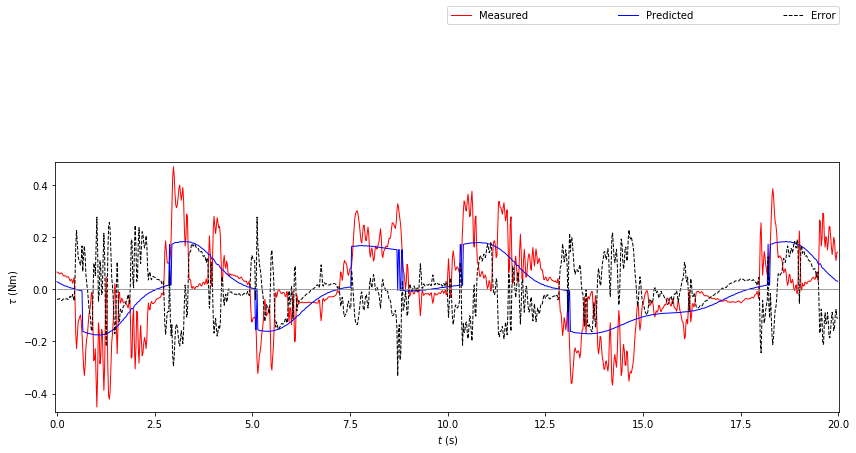

In [1081]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_prime)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [1082]:
dict_subs = dict(zip(beta_symbs, beta_prime.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_prime.flatten().tolist()[0])))

test = 'ok'
for i, DBi in enumerate(DB_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print i, v
                test = 'fail'
print(test)

ok


In [1083]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_prime.dat', beta_prime)

## Feasible Base Parameter Estimation with Weight Least Squares (FBPE-WLS)     ($\beta^\star$)

In [1084]:
u = sympy.Symbol('u')
U_rho = BlockMatrix([[Matrix([u - rho2_norm_sqr_wls]), (rho1_wls - R1_wls*beta_symbs).T],
                     [rho1_wls - R1_wls*beta_symbs,                       I(n_beta)]])
U_rho = U_rho.as_explicit()

In [1085]:
lmis_fbpe_ols = [LMI(U_rho)] + DB_LMIs_marg

In [1086]:
variables_fbpe_ols = [u] + list(beta_symbs) + list(delta_d)

In [1087]:
objf_fbpe_ols = u

In [1088]:
sol_fbpe_ols = solve_sdp(objf_fbpe_ols, lmis_fbpe_ols, variables_fbpe_ols)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 15 
Matrix Blocks: 5, Total Number of Constraints: 16 
Nonzeros in Constraints: 63

Read Data File into Buffer:      1.311e-04 seconds
DSDP Set Data:                   6.890e-05 seconds
DSDP Process Data:               2.849e-04 seconds

Data Norms: C: 2.87e+01, A: 8.09e+02, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -4.35384048e+12   2.0e+00   4.4e+04   4.4e+12  0.00  0.00   0.00 
10    3.85783042e+10   -1.15055639e+09   4.1e+02   1.1e+01   1.2e+08  1.00  1.00   5.58 
20    3.41417326e+04   -1.30449442e+03   3.1e-04   0.0e+00   3.0e+02  1.00  1.00   0.45 
30   -2.43990026e+01   -2.72561615e+01   2.5e-08   0.0e+00   6.3e-04  1.00  1.00  30.91 
36   -2.72483165e+01   -2.72483181e+01   1.4e-14   0.0e+00

In [1089]:
u_star = sol_fbpe_ols[0,0]
beta_star = numpy.matrix(sol_fbpe_ols[1:1+n_beta])
delta_d_star = numpy.matrix(sol_fbpe_ols[1+n_beta:])

In [1090]:
u_star

27.248318170176645

### plot measured and predicted torque

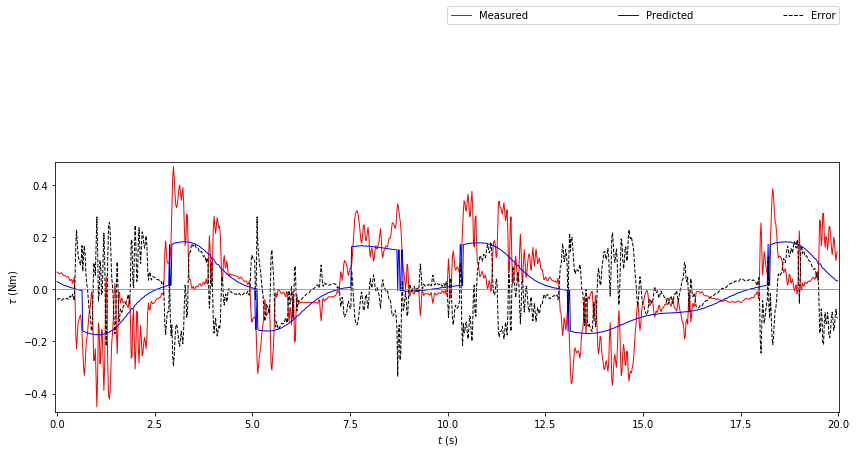

In [1091]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

proc = numpy.load(tmpfolder + 'procdata/' + indentification_traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

tau_p = np.zeros(tau.shape)
tau_ps = W.dot(beta_star)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [1092]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_star.flatten().tolist()[0])))

test = 'ok'
for DBi in DB_blocks:
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0:
                print(v)
                test = 'fail'
print(test)

ok


In [1093]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_star.dat', beta_star)

## Additional Constraints on Centers-of-Mass    ($\beta^{\star e}$)

In [1094]:
link_cuboid_hulls = [
[[ -0.0050 , +0.0050 ],[ -0.2 , -0.10 ],[ -0.010 , +0.010 ]]
# [[ -0.10 , +0.70 ],[ -0.10 , +0.10 ],[ -0.10 , +0.10 ]],
# [[ -0.10 , +0.60 ],[ -0.10 , +0.10 ],[ -0.10 , +0.10 ]],
# [[ -0.10 , +0.10 ],[ -0.10 , +0.10 ],[ -0.10 , +0.10 ]],
# [[ -0.10 , +0.10 ],[ -0.10 , +0.10 ],[ -0.10 , +0.10 ]],
# [[ -0.05 , +0.05 ],[ -0.05 , +0.05 ],[ -0.05 , +0.05 ]],
]

robotmaxmass = 0.25

#### LMI Matrix Definition

In [1095]:
D_add_blocks = []
for i in range(rbt.dof):
    l = rbt.rbtdef.l[i]
    m = rbt.rbtdef.m[i]
    link_cuboid_hull = link_cuboid_hulls[i]
    for j in range(3):
        D_add_blocks.append( Matrix( [[  l[j] - m*link_cuboid_hull[j][0] ]] ) )
        D_add_blocks.append( Matrix( [[ -l[j] + m*link_cuboid_hull[j][1] ]] ) )

D_add_blocks.append(Matrix([robotmaxmass - sum(rbt.rbtdef.m)]))

#### Variable Change and LMI Definition

In [1096]:
DB_add_blocks = [ mrepl(Di, varchange_dict) for Di in D_add_blocks ]

In [1097]:
DB_add_LMIs = list(map(LMI_PD, DB_add_blocks))

In [1098]:
DB_add_LMIs_marg = list(map(lambda lm: LMI(lm, epsilon_safemargin*eye(lm.shape[0])) , DB_add_blocks))

In [1099]:
DB_add_LMIs_marg[0]

Matrix([[beta2 + 0.005*m_1]]) >= Matrix([[1.0e-6]])

In [1100]:
DB_add_LMIs_marg[-1]

Matrix([[-m_1 + 0.25]]) >= Matrix([[1.0e-6]])

### Testing $\beta^\star$ solution on new constraints

In [1101]:
dict_subs = dict(zip(beta_symbs, beta_star.flatten().tolist()[0]))
lmis_star_bpft_add = [ lmi_sdp.LMI_PD(mrepl(lmi.canonical().gts, dict_subs)) for lmi in DB_add_LMIs_marg ]
variables_star_bpft_add = list(delta_d)
objf_star_bpft_add = delta_d[0]

In [1102]:
sol_star_bpft_add = solve_sdp(objf_star_bpft_add, lmis_star_bpft_add, variables_star_bpft_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 8 
Matrix Blocks: 7, Total Number of Constraints: 7 
Nonzeros in Constraints: 16

Read Data File into Buffer:      6.795e-05 seconds
DSDP Set Data:                   8.607e-05 seconds
DSDP Process Data:               9.990e-05 seconds

Data Norms: C: 2.50e-01, A: 1.75e+00, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 10

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -1.47889897e+11   2.0e+00   1.5e+03   1.5e+11  0.00  0.00   0.00 
10    9.95071256e+06    9.94970187e+06   1.0e+08   5.0e-04   1.9e+00  1.00  1.00  86.21 
16    9.94979828e+06    9.94979827e+06   1.0e+08   5.0e-04   1.9e-04  1.00  0.07  19.42 
DSDP Converged. 
DSDP Primal Unbounded, Dual Infeasible

P Objective  :  -5.02017274e+04 
DSDP Solution:   1.00000000e+07 

DSDP Solve Time:        

### Finding new solution

In [1103]:
lmis_fbpe_ols_add = [LMI(U_rho)] + DB_LMIs_marg + DB_add_LMIs_marg

In [1104]:
variables_fbpe_ols_add = [u] + list(beta_symbs) + list(delta_d)

In [1105]:
objf_fbpe_ols_add = u

In [1106]:
sol_fbpe_ols_add = solve_sdp(objf_fbpe_ols_add, lmis_fbpe_ols_add, variables_fbpe_ols_add)

sdp.dat-s -save dsdp5.out -gaptol 1e-07 

Variables 15 
Matrix Blocks: 12, Total Number of Constraints: 23 
Nonzeros in Constraints: 83

Read Data File into Buffer:      1.550e-04 seconds
DSDP Set Data:                   7.391e-05 seconds
DSDP Process Data:               2.911e-04 seconds

Data Norms: C: 2.87e+01, A: 8.09e+02, b: 1.00e+00
Scale C: 1.00e+00

Potential Parameter: 5.00
Reapply Schur matrix: 4

Iter   PP Objective      DD Objective    PInfeas   DInfeas     Nu     StepLength   Pnrm
---------------------------------------------------------------------------------------
0     1.00000000e+10   -5.01603548e+12   2.0e+00   5.0e+04   5.0e+12  0.00  0.00   0.00 
10    2.70666837e+11   -1.67104913e+10   1.5e+03   1.7e+02   2.3e+08  1.00  1.00  147.73 
20    2.88433171e+06   -5.02361232e+04   1.0e-02   0.0e+00   9.6e+03  1.00  1.00   1.22 
30    3.24130598e+02   -3.38677500e+01   1.3e-06   0.0e+00   1.7e+00  0.74  1.00   0.48 
40   -2.72586826e+01   -2.72932810e+01   1.2e-10   0.0e+

In [1107]:
u_starextra = sol_fbpe_ols_add[0,0]
beta_starextra = numpy.matrix(sol_fbpe_ols_add[1:1+n_beta])
delta_d_starextra = numpy.matrix(sol_fbpe_ols_add[1+n_beta:])

In [1108]:
u_starextra

27.29288647483759

### plot measured and predicted torque

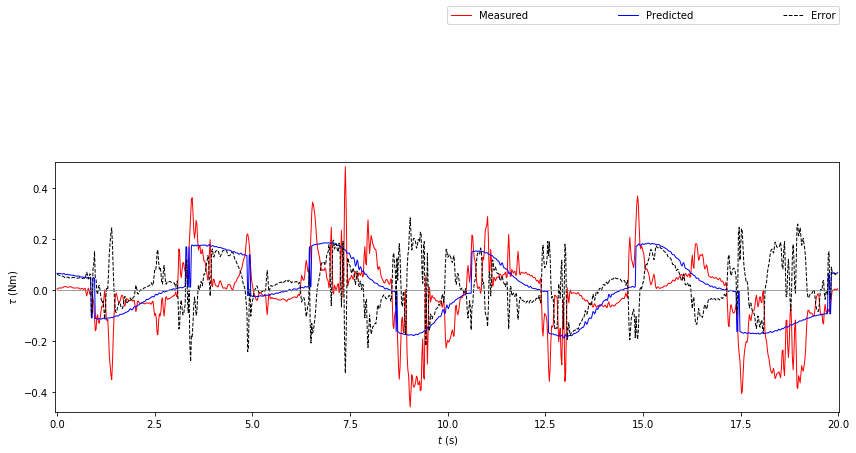

In [1109]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj = 'traj2'
proc = numpy.load(tmpfolder + 'procdata/' + traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

regr_mats1 = np.load(tmpfolder + 'procdata/' + traj + '_regr.npz')
W1 = np.matrix(regr_mats1['W'])

tau_p = np.zeros(tau.shape)
tau_ps = W1.dot(beta_starextra)
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### Solution Double Check

In [1110]:
dict_subs = dict(zip(beta_symbs, beta_starextra.flatten().tolist()[0]))
dict_subs.update(dict(zip(delta_d, delta_d_starextra.flatten().tolist()[0])))

test = 'ok'
for DBi in (DB_blocks + DB_add_blocks):
        m = numpy.matrix(mrepl(DBi, dict_subs)).astype(float)
        for v in numpy.linalg.eigvals( m ):
            if v <= 0.0: test = 'fail'
print(test)

ok


In [1111]:
numpy.savetxt(tmpfolder + 'solutions/' + indentification_traj + '_beta_starextra.dat', beta_starextra)

### Inertia Matrix Definiteness Tests

In [997]:
def test_mass_matrix_psd(beta_solution):
    K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T
    A = numpy.matrix(K).astype(float)
    b = numpy.matrix(beta_solution).astype(float)
    x = numpy.linalg.pinv(A) * b
    d_test = x
    
    M_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.M_code, 'M', 'M_func', rbt.rbtdef)
    exec(M_func_def, globals())
    global sin, cos
    from math import sin, cos
    
    ntests = 10000
    
    ok = 0
    nok = 0
    for i in range(ntests):
        q_test = numpy.random.rand(rbt.dof)
        M_out = M_func( numpy.array(d_test).flatten().tolist())#, q_test)
        M = numpy.matrix(M_out).reshape((rbt.dof,rbt.dof))
        try:
            c = numpy.linalg.cholesky(M)
        except:
            nok += 1
            continue
        ok += 1
        
    print 'ok     %8i  %3i%%'%(ok, 100.0*ok/ntests) 
    print 'not ok %8i  %3i%%'%(nok, 100.0*nok/ntests)
    if nok > 0 :
        print('\nNot PSD -> Not feasible!')
    else:
        print('\nSeems feasible.')

In [375]:
beta_ols = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_ols.dat')).T
test_mass_matrix_psd(beta_ols)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [110]:
K = rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T
A = numpy.matrix(K).astype(float)
b = numpy.matrix(beta_ols).astype(float)
x = numpy.linalg.pinv(A) * b
d_test = x
d_test

matrix([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.00307864],
        [-0.00099348],
        [ 0.00090093],
        [ 0.        ],
        [ 0.        ],
        [ 0.00307864],
        [ 0.05177757],
        [ 0.01417449],
        [-0.01318502]])

In [241]:
M_func_def = sympybotics.robotcodegen.robot_code_to_func( 'python', rbt.M_code, 'M', 'M_func', rbt.rbtdef)
print M_func_def

def M_func(parms):
#
    M = [0]*1
#

    M[0] = parms[10] + parms[5]
#
    return M


In [376]:
beta_wls = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_wls.dat')).T
test_mass_matrix_psd(beta_wls)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [377]:
beta_prime = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_prime.dat')).T
test_mass_matrix_psd(beta_prime)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [378]:
beta_star = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_star.dat')).T
test_mass_matrix_psd(beta_star)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [379]:
beta_starextra = numpy.matrix(numpy.loadtxt(tmpfolder + 'solutions/traj1_beta_starextra.dat')).T
test_mass_matrix_psd(beta_starextra)

ok        10000  100%
not ok        0    0%

Seems feasible.


5 - Regression Model Validation
====================================================

In [1112]:
import numpy as np
import sympybotics
import pickle

from collections import OrderedDict
from support_funcs.utils import ListTable

In [1113]:
with open(tmpfolder +  'robotmodels/mx64_model.pkl', 'rb' ) as file:
          rbt = pickle.load( file )

In [1114]:
def analyse(W, omega, R1, beta):
    from numpy import matrix, mean
    from numpy.linalg import cond, norm
    
    p = dict()
    
    n = W.shape[0]
    
    omega_norm = norm(omega)
    omega_mean = mean(omega)
    
    p['err'] = norm(omega - W * beta)
    p['merr'] = p['err'] / n
    
    p['se'] = p['err']**2
    p['mse'] = p['se']/(n-W.shape[1])
    p['rmse'] = p['mse']**0.5
    
    C = p['mse'] * (R1.T * R1).I
    p['sd'] = np.sqrt(C.diagonal()).T
    p['sd%'] = 100. * p['sd'] / np.abs(beta)
    
    p['relerr'] = p['err']/ omega_norm
    p['relerr%'] = p['relerr']*100.
    
    p['1-r2'] = p['err']**2 / norm(omega - omega_mean)**2
    p['r2'] = 1 - p['1-r2']

    return p
    

In [1115]:
# trajs = OrderedDict([('id', 'traj1'),
#                      ('vA', 'traj2'),
#                      ('vB', 'traj3'),
#                      ('vC', 'traj4')])

trajs = OrderedDict([('id', 'traj1'),
                     ('vA', 'traj2'),
                     ('vB', 'traj3'),
                     ('vC', 'traj4')
                     ])

betas = OrderedDict([('beta_ols', 'B^'),
                     ('beta_wls', 'B~'),
                     ('beta_prime', 'B\''),
                     ('beta_star', 'B*'),
                     ('beta_starextra', 'B*e')])

In [1116]:
solutions_beta = {betaname:np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T for betaname in betas}

In [1117]:
analysis = dict()

for traj in trajs:
    from numpy.linalg import cond
    
    print(traj)
    
    analysis[traj] = dict()
    
    regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
    W = np.matrix(regr_mats['W'])
    omega = np.matrix(regr_mats['omega'])
    R1 = np.matrix(regr_mats['R1'])
    
    analysis[traj]['cond'] = cond(W)
    
    analysis[traj]['betas'] = dict()
    
    for betaname in betas:
        beta = solutions_beta[betaname]
        analysis[traj]['betas'][betaname] = analyse(W, omega, R1, beta)
    
    del W, omega, R1

id
vA
vB
vC


In [1118]:
prop = lambda x: x['relerr%']
form = '%.2f'

table = ListTable()
table.append([''] + ['cond'] + betas.values())
for (traj, trajname) in zip(trajs, ['identification', 'validation A', 'validation B', 'validation C']):
    row = [traj] + ['%.0f'%analysis[traj]['cond']] + [ form%prop(analysis[traj]['betas'][b]) for b in betas]
    table.append(row)
table

,cond,B^,B~,B',B*,B*e
id,19,64.04,64.04,64.04,64.04,64.10
vA,17,73.67,73.67,73.75,73.68,73.84
vB,17,72.27,72.27,72.23,72.19,72.32
vC,20,67.82,67.82,67.80,67.80,67.94


In [1119]:
import yaml, sympy
with open(datafolder + 'robotparams/mx64_cad.yml', 'r') as f:
    mx64_cad = yaml.load(f)
delta_cad = sympy.Matrix([mx64_cad.get(str(d), d) for d in rbt.dyn.dynparms])
beta_cad = (rbt.dyn.Pb.T + rbt.dyn.Kd * rbt.dyn.Pd.T) * delta_cad

In [1120]:
beta_cad 

Matrix([
[0.005513919],
[          0],
[   -0.01475],
[          0],
[          0],
[          0]])

### plot measured and predicted torque

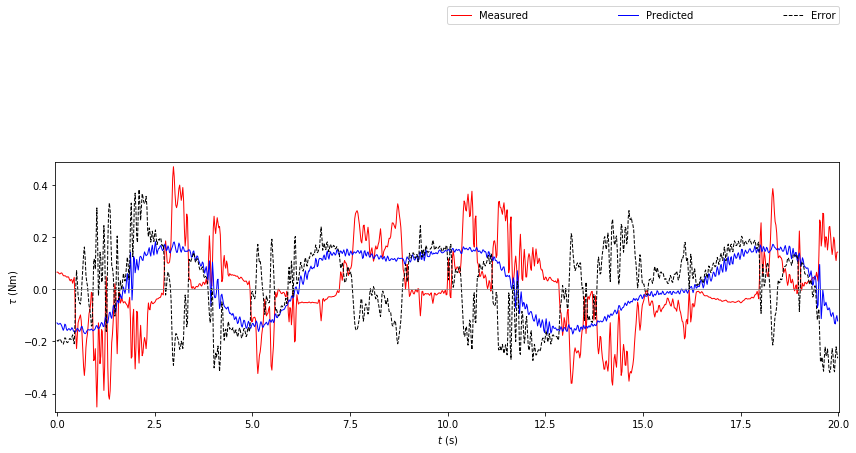

In [1121]:
# from support_funcs.regr_data_proc import  plot_meas_pred_tau

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

traj = 'traj1'
proc = numpy.load(tmpfolder + 'procdata/' + traj + '_proc.npz')
t = proc['t']
tau = proc['tau']

regr_mats1 = np.load(tmpfolder + 'procdata/' + traj+ '_regr.npz')
W1 = np.matrix(regr_mats1['W'])

tau_p = np.zeros(tau.shape)
tau_ps = W1.dot(numpy.matrix(beta_cad).astype(float))
for i in range(dof):
    tau_p[:, i] = tau_ps[i::dof].flatten()

base_freq = 0.05    
trajectory_sampling_rate = 50
plot_data_num = int(1 / base_freq * trajectory_sampling_rate)
plot_meas_pred_tau(t[:plot_data_num], tau[:plot_data_num, :],
                   tau_p[:plot_data_num, :])

### $\beta^{cad}$  Double Check

In [1009]:
def  test_lmi_matrix_psd(delta_solution):
    dict_subs = dict(zip(delta, delta_solution))

    test = 'ok'
    for Di in D_blocks:
            m = numpy.matrix(mrepl(Di, dict_subs)).astype(float)
            for v in numpy.linalg.eigvals( m ):
                if v <= 0.0:
                    print(v)
                    test = 'fail'
    print(test)

In [1010]:
test_lmi_matrix_psd(delta_cad)

-0.01475
-0.01224848370187312
0.0
0.0
0.0
0.0
0.0
fail


In [1011]:
test_mass_matrix_psd(beta_cad)

ok        10000  100%
not ok        0    0%

Seems feasible.


In [1122]:
form = '%.4g'

import sympy

table = ListTable()
header = ['', 'Bcad', 'B^', '% std dev B^', 'B*ext']
table.append(header)
for i, b in enumerate(rbt.dyn.baseparms.n()):
    if beta_cad[i].is_Number:
        cad_v = sympy.N(beta_cad[i], 4)
    elif beta_cad[i].is_Symbol:
        cad_v = '---'
    else:
        cad_v = sympy.N(beta_cad[i], 4)
    row = ['%.7s ...'%b if len(str(b)) > 107 else str(b), cad_v]
    row += [form%solutions_beta['beta_ols'][i,0], '%.2g'%analysis['id']['betas']['beta_ols']['sd%'][i,0]]
    row += [form%solutions_beta['beta_starextra'][i,0]]
    table.append(row)
table

,Bcad,B^,% std dev B^,B*ext
Ia_1 + L_1zz,0.005514,-0.0005617,1.3e+02,0.0008937
l_1x,0,0.0009707,67,0.0004437
l_1y,-0.01475,-0.00909,3.2,-0.008894
fv_1,0,0.01499,21,0.01469
fc_1,0,0.07807,4.3,0.07848
fo_1,0,0.006278,67,0.003748


## Torque Plot

In [1013]:
traj = 'id'
betaname = 'beta_star'

In [1014]:
regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_regr.npz')
W = np.matrix(regr_mats['W'])
omega = np.matrix(regr_mats['omega'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_proc.npz')
t = regr_mats['t']
tau_proc = np.matrix(regr_mats['tau'])

regr_mats = np.load(tmpfolder + 'procdata/' + trajs[traj] + '_raw.npz')
tau_raw = np.matrix(regr_mats['tau'])

In [1015]:
beta_solution = np.matrix(np.loadtxt(tmpfolder + 'solutions/%s_%s.dat'%(trajs['id'], betaname))).T

In [1016]:
tau = tau_raw

In [1017]:
omega_pred = W * beta_solution
tau_pred = omega_pred.reshape( omega_pred.shape[0]/tau.shape[1], tau.shape[1] )
err_pred = tau - tau_pred

In [1018]:
joint = 1
firsts = 2000
s=tau_raw.shape[0]

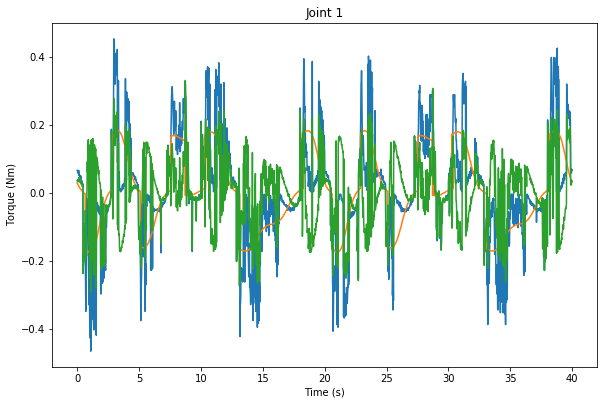

In [1019]:
from matplotlib import pyplot as plt
plt.close()

plt.figure(figsize=(24,16))

axes = []
for i in range(tau.shape[1]):
    ax = plt.subplot(3, 3, i+1)
    ax.plot(t[:firsts],tau_raw[:,i][:firsts], label="Measured torque")
    ax.plot(t[:firsts],tau_pred[:,i][:firsts], label="Estimated torque")
    ax.plot(t[:firsts],err_pred[:,i][:firsts], label="Error")
    ax.set_title( "Joint %d"%(i+1) )
    plt.xlabel("Time (s)")
    plt.ylabel("Torque (Nm)")
    axes.append(ax)

plt.tight_layout()

plt.show()

In [1123]:
beta_starextra

matrix([[ 0.00089373],
        [ 0.00044365],
        [-0.0088941 ],
        [ 0.01468671],
        [ 0.07847731],
        [ 0.00374825]])

In [1124]:
delta_starextra = Pb*beta_starextra + (-Pb*rbt.dyn.Kd+rbt.dyn.Pd)*delta_d_starextra
K = np.matrix(Pb.T+rbt.dyn.Kd*rbt.dyn.Pd.T).astype(float)
delta_starextra_min = np.linalg.pinv(K)*beta_starextra

In [1125]:
np.testing.assert_array_almost_equal(K * delta_starextra ,beta_starextra, 10)

In [1126]:
for i in range(delta_starextra.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_starextra[i,0]) + ';'

double L_1xx    =    5773502.69220119;
double L_1xy    =    2.64975548524552e-5;
double L_1xz    =    0;
double L_1yy    =    5773502.69189706;
double L_1yz    =    0;
double L_1zz    =    0.000892733733318905;
double l_1x    =    0.000443654338066075;
double l_1y    =    -0.00889409741507762;
double l_1z    =    0;
double m_1    =    0.0889309526955287;
double Ia_1    =    1.00037623157592e-6;
double fv_1    =    0.0146867114083109;
double fc_1    =    0.0784773080346065;
double fo_1    =    0.00374824729158711;


In [1127]:
for i in range(delta_starextra.shape[0]):
     print 'double ' + repr(rbt.dyn.dynparms[i]) + '    =    ' + repr(delta_starextra_min[i,0]) + ';'

double L_1xx    =    0.0;
double L_1xy    =    0.0;
double L_1xz    =    0.0;
double L_1yy    =    0.0;
double L_1yz    =    0.0;
double L_1zz    =    0.00044686705477524043;
double l_1x    =    0.0004436543380660745;
double l_1y    =    -0.008894097415077622;
double l_1z    =    0.0;
double m_1    =    0.0;
double Ia_1    =    0.00044686705477524043;
double fv_1    =    0.01468671140831087;
double fc_1    =    0.07847730803460651;
double fo_1    =    0.0037482472915871105;


---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

---------------------------

### (generate readme and notebook preview)

In [3]:
def save_files(): 
    from IPython.display import display, Javascript
    Javascript('IPython.notebook.save_notebook()')
    
    import json
    with open('WAM7 Dynamic Parameter Identification.ipynb', 'r') as f:
        d = json.load(f)
    with open('README.md', 'w') as f:
        f.write(''.join(d['worksheets'][0]['cells'][0]['source']).encode('UTF-8'))
    
    !ipython nbconvert "WAM7 Dynamic Parameter Identification.ipynb" --to html

In [3]:
#save_files()

In [36]:
#!git status

In [37]:
#!git commit -a -m "Add automathic README.md file generator"

In [38]:
#!git push